# CART Algorithm Implementation


# CART (Classification and Regression Trees) for Stress Detection and Management
---
---

This Jupyter Notebook demonstrates the application of the CART algorithm to a dataset that includes physiological and behavioral features such as heart rate, skin conductance, EEG, temperature, pupil diameter, and more. The goal is to predict the **Engagement Level** of individuals, which has various applications, particularly in **stress detection** and **management systems**.

---

## CART Model

CART (**Classification and Regression Trees**) is a fundamental machine learning algorithm that creates a single decision tree for both classification and regression tasks. By using recursive binary splitting, CART identifies the most important features and their optimal split points to partition the data. This approach ensures that predictions are based on the most informative splits at each step.

CART is known for its simplicity and interpretability, making it a popular choice for applications where transparency and explainability are important.

---

## The `max_depth` Parameter

A crucial parameter in the CART model is `max_depth`, which determines the maximum depth of the decision tree. This parameter significantly influences the model's complexity and performance:

### **Low `max_depth` (2-5):**
- The tree is shallow, leading to underfitting.
- Training time is faster but may fail to capture complex patterns in the data.

### **Moderate `max_depth` (10-20):**
- Balances the ability to capture data complexity with model simplicity.
- Reduces the risk of overfitting while improving accuracy.

### **High `max_depth` (50+):**
- Allows the tree to grow very deep, potentially overfitting the data.
- May capture noise in the training set, leading to poorer generalization.

---

## Objectives of This Notebook

- **Model Training**: Train a CART model using the dataset and evaluate the impact of varying the `max_depth` parameter on model performance.
- **Model Evaluation**: Assess the model's accuracy, generate confusion matrices, and present a classification report.
- **Visualization**: Visualize the decision boundaries and confusion matrix for better interpretation of the model's predictions.

---

## The Aim

The aim is to explore how adjusting the `max_depth` parameter affects the CART model's ability to predict engagement levels while considering both accuracy and computational efficiency.

By fine-tuning the `max_depth`, we aim to find a balance between underfitting and overfitting to achieve optimal predictive performance.


## 1) Import the packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import display, Markdown

## 2) Load the dataset

In [2]:
df = pd.read_csv(r'DT_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             1000 non-null   int64  
 1   SkinConductance       1000 non-null   float64
 2   EEG                   1000 non-null   float64
 3   Temperature           1000 non-null   float64
 4   PupilDiameter         1000 non-null   float64
 5   SmileIntensity        1000 non-null   float64
 6   FrownIntensity        1000 non-null   float64
 7   CortisolLevel         1000 non-null   float64
 8   ActivityLevel         1000 non-null   int64  
 9   AmbientNoiseLevel     1000 non-null   int64  
 10  LightingLevel         1000 non-null   int64  
 11  EmotionalState        1000 non-null   object 
 12  ES_disengaged         1000 non-null   int64  
 13  ES_engaged            1000 non-null   int64  
 14  ES_partially engaged  1000 non-null   int64  
 15  CognitiveState        

## 3) Create the test train split

In [3]:
attr = df.drop('EngagementLevel', axis=1).select_dtypes(exclude='object')
target = df['EngagementLevel']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

In [4]:
attr_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 904 to 867
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             700 non-null    int64  
 1   SkinConductance       700 non-null    float64
 2   EEG                   700 non-null    float64
 3   Temperature           700 non-null    float64
 4   PupilDiameter         700 non-null    float64
 5   SmileIntensity        700 non-null    float64
 6   FrownIntensity        700 non-null    float64
 7   CortisolLevel         700 non-null    float64
 8   ActivityLevel         700 non-null    int64  
 9   AmbientNoiseLevel     700 non-null    int64  
 10  LightingLevel         700 non-null    int64  
 11  ES_disengaged         700 non-null    int64  
 12  ES_engaged            700 non-null    int64  
 13  ES_partially engaged  700 non-null    int64  
 14  CS_distracted         700 non-null    int64  
 15  CS_focused            700 

In [5]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 904 to 867
Series name: EngagementLevel
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


## 4) CART model using decision tree classifier over different max depths

In [6]:
depths = [2, 5, 10, 15]
models = []
for i in range(len(depths)):
    model = DecisionTreeClassifier(max_depth=depths[i], random_state=42)
    models.append(model)
models

[DecisionTreeClassifier(max_depth=2, random_state=42),
 DecisionTreeClassifier(max_depth=5, random_state=42),
 DecisionTreeClassifier(max_depth=10, random_state=42),
 DecisionTreeClassifier(max_depth=15, random_state=42)]

In [7]:
preds = {}
for i in range(len(depths)):
    model = models[i]
    print(f'Training on model: {model}')

    model.fit(attr_train,target_train)
    target_pred = model.predict(attr_test)
    preds[depths[i]] = target_pred

Training on model: DecisionTreeClassifier(max_depth=2, random_state=42)
Training on model: DecisionTreeClassifier(max_depth=5, random_state=42)
Training on model: DecisionTreeClassifier(max_depth=10, random_state=42)
Training on model: DecisionTreeClassifier(max_depth=15, random_state=42)


## 5) Model Evaluations

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 2 DEPTH</strong></h1></center>

<h3><strong>Accuracy: 0.9100</strong></h3>

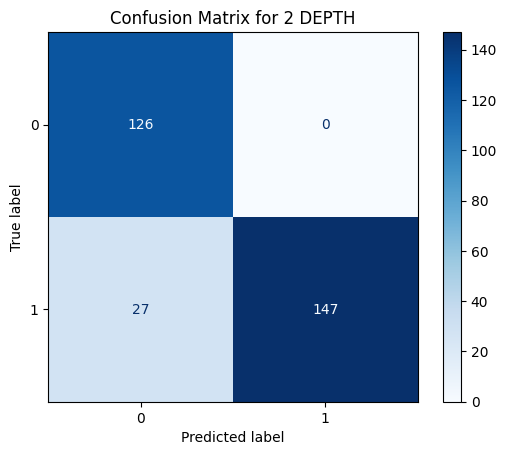

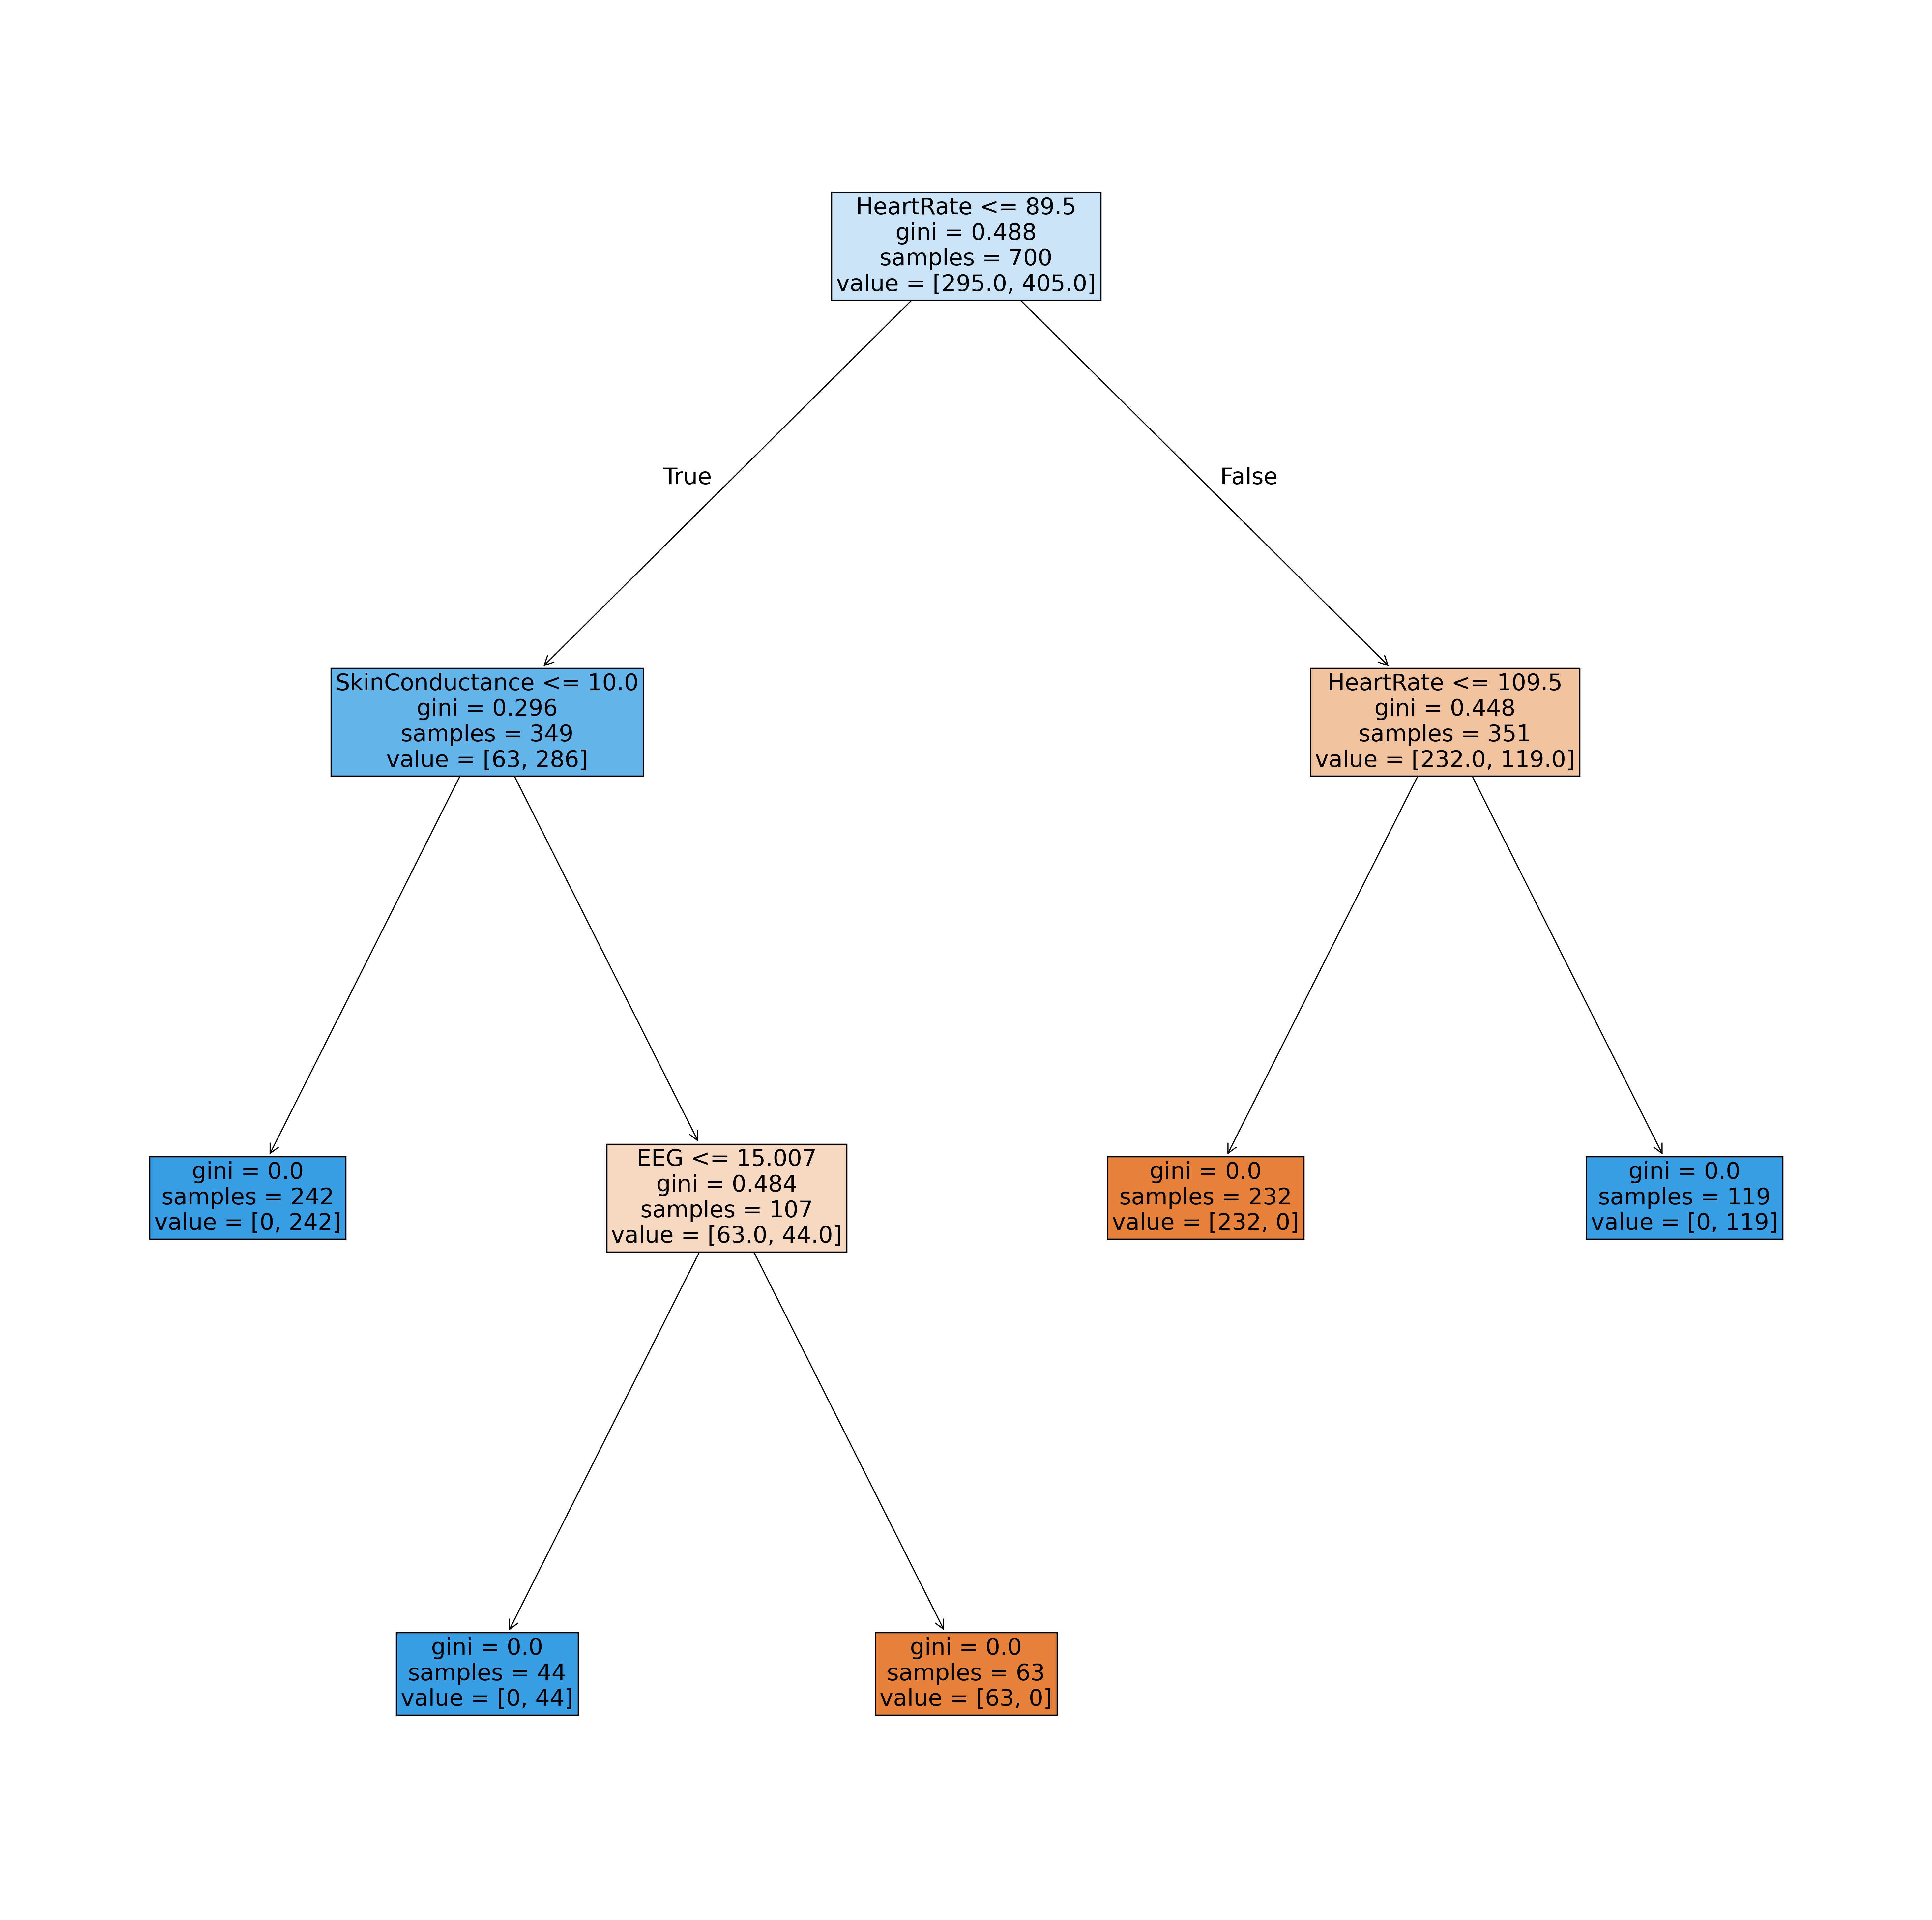

Classification Report:
              precision    recall  f1-score   support

           1       0.82      1.00      0.90       126
           2       1.00      0.84      0.92       174

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.93      0.91      0.91       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 5 DEPTH</strong></h1></center>

<h3><strong>Accuracy: 1.0000</strong></h3>

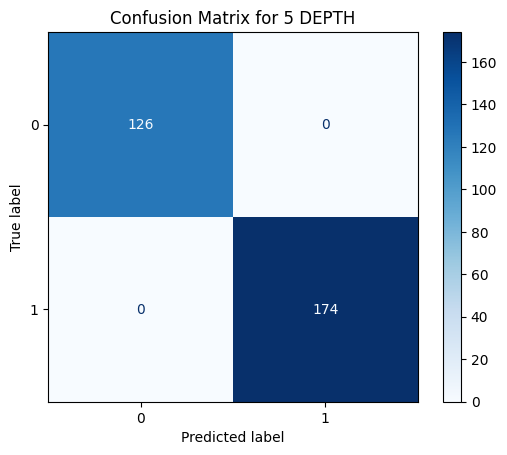

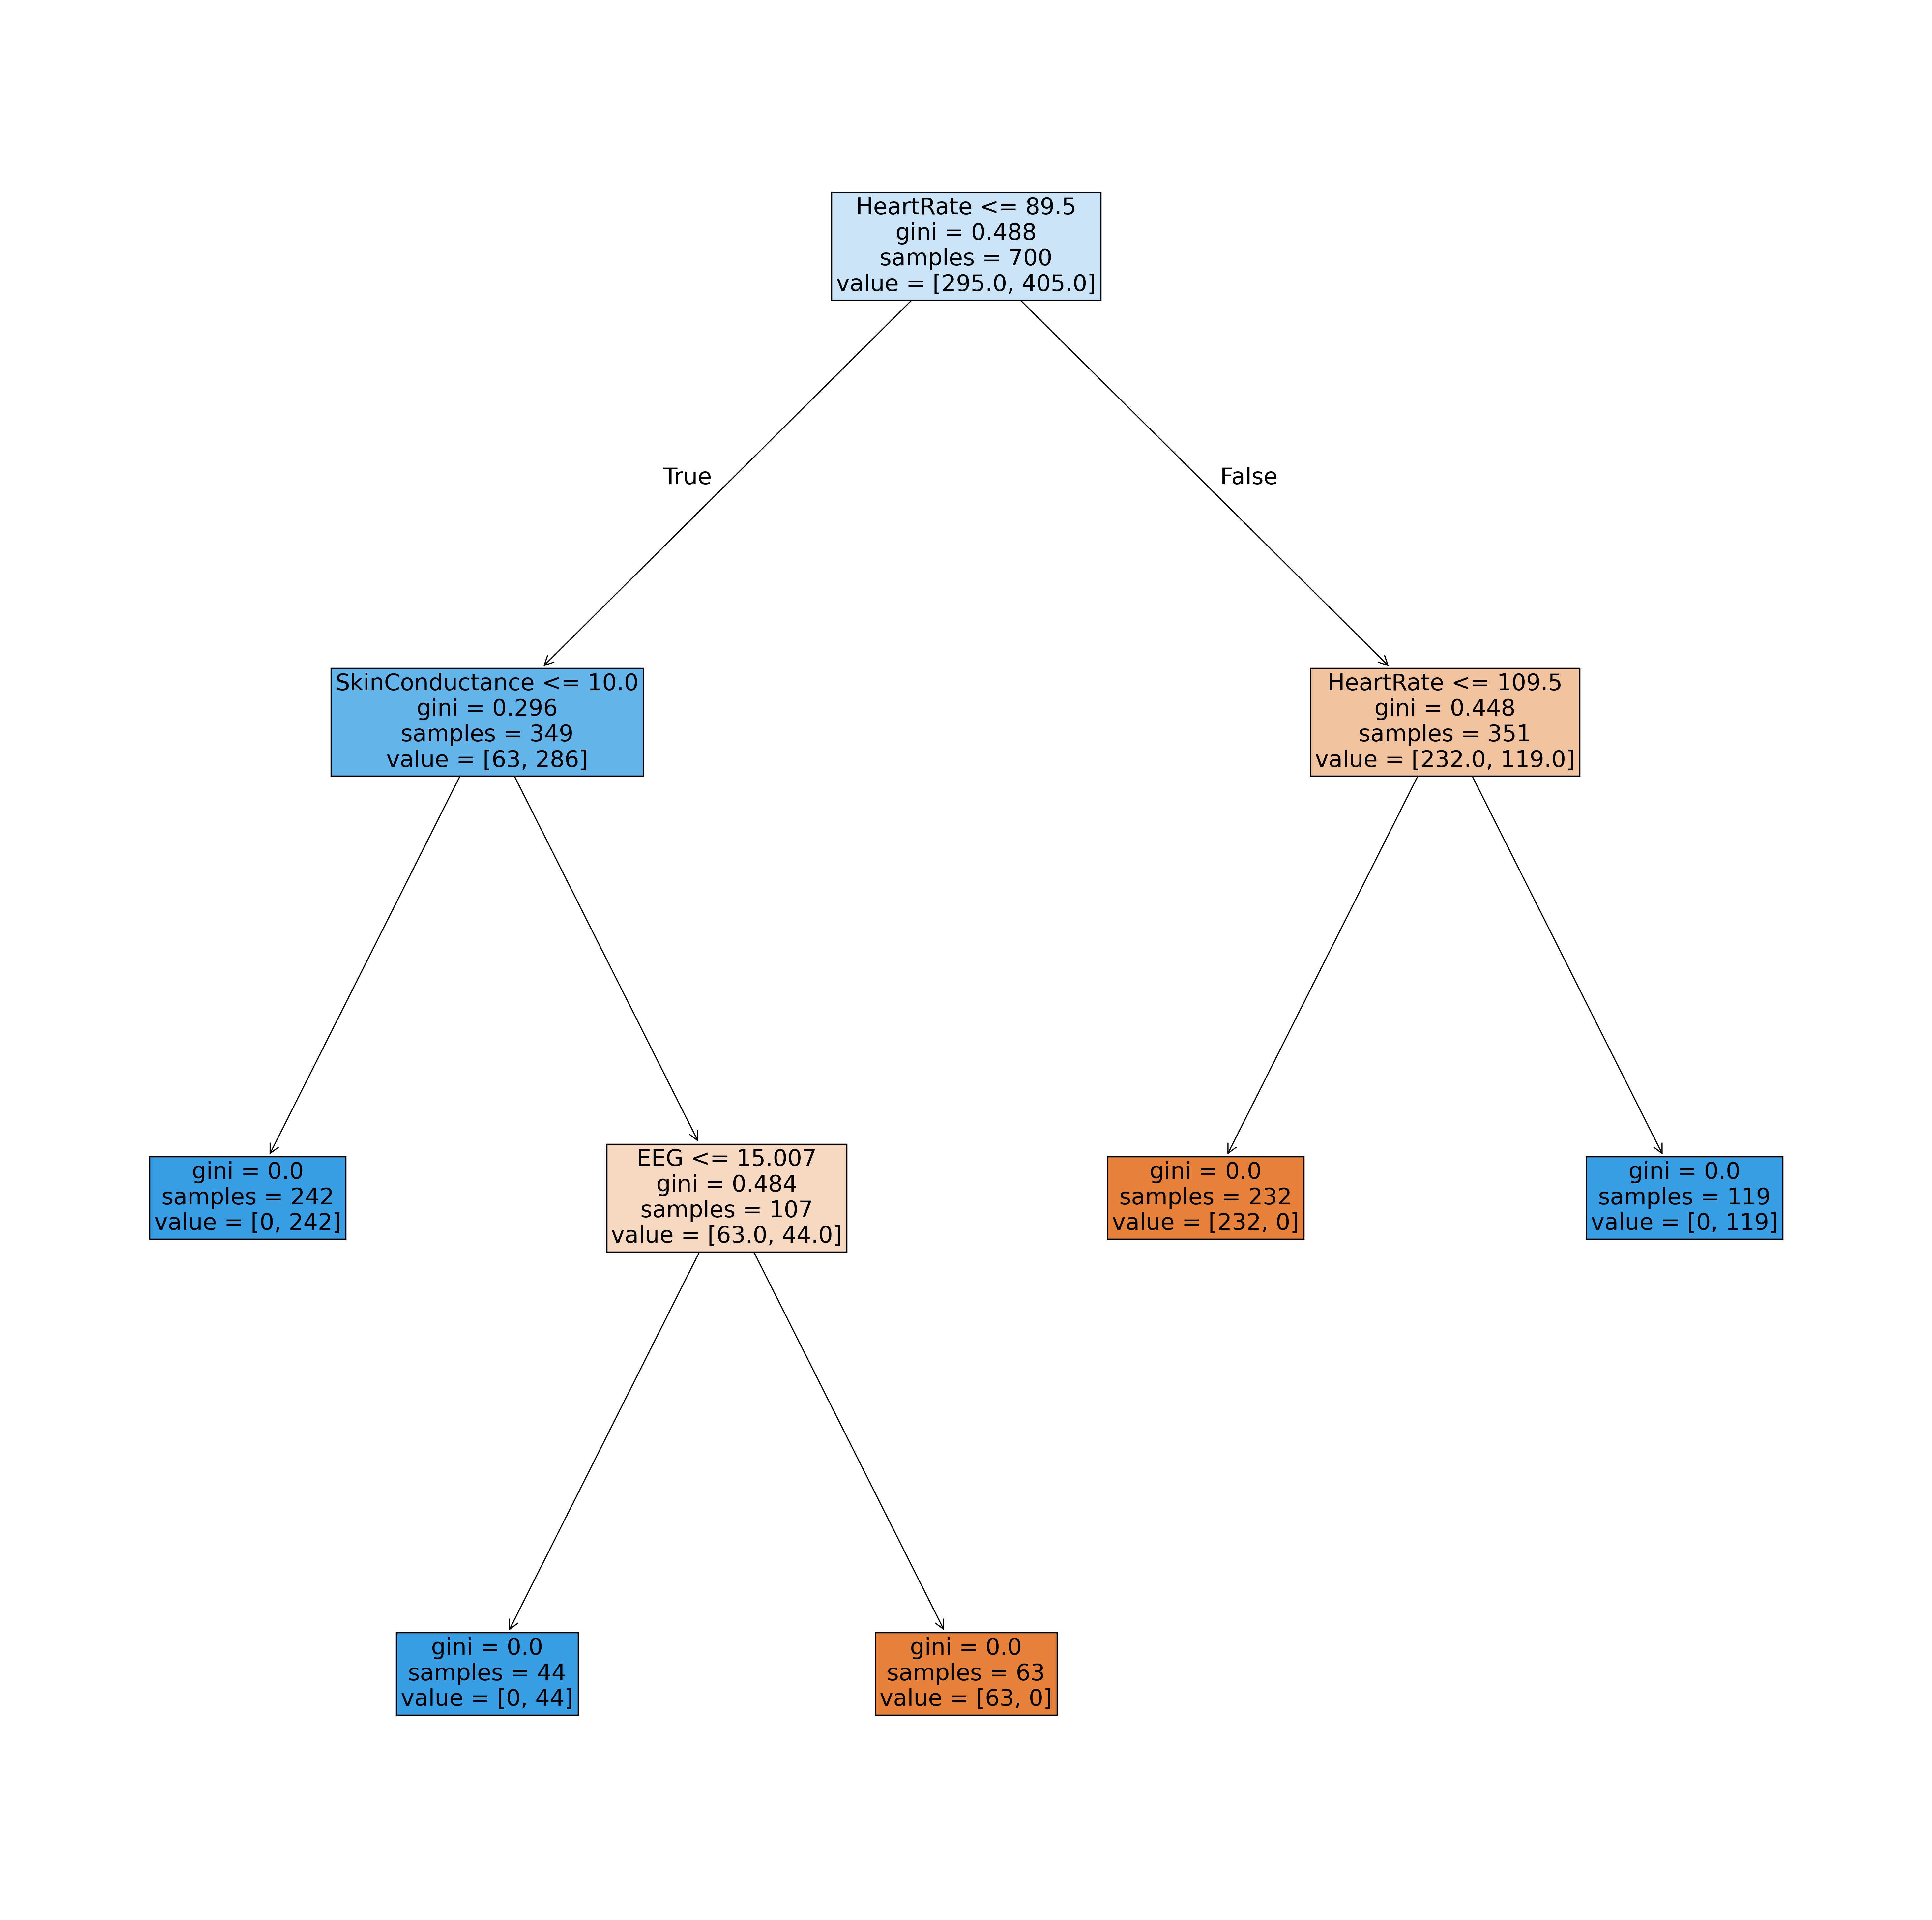

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 10 DEPTH</strong></h1></center>

<h3><strong>Accuracy: 1.0000</strong></h3>

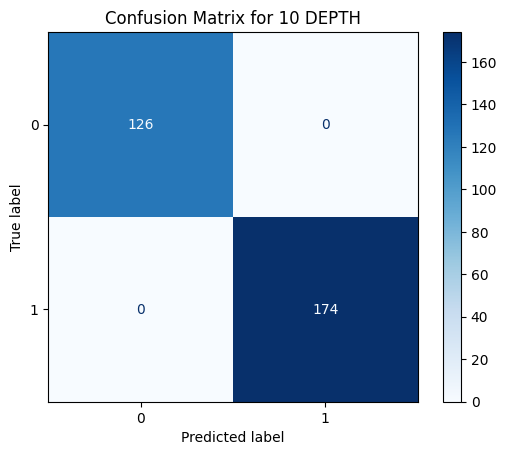

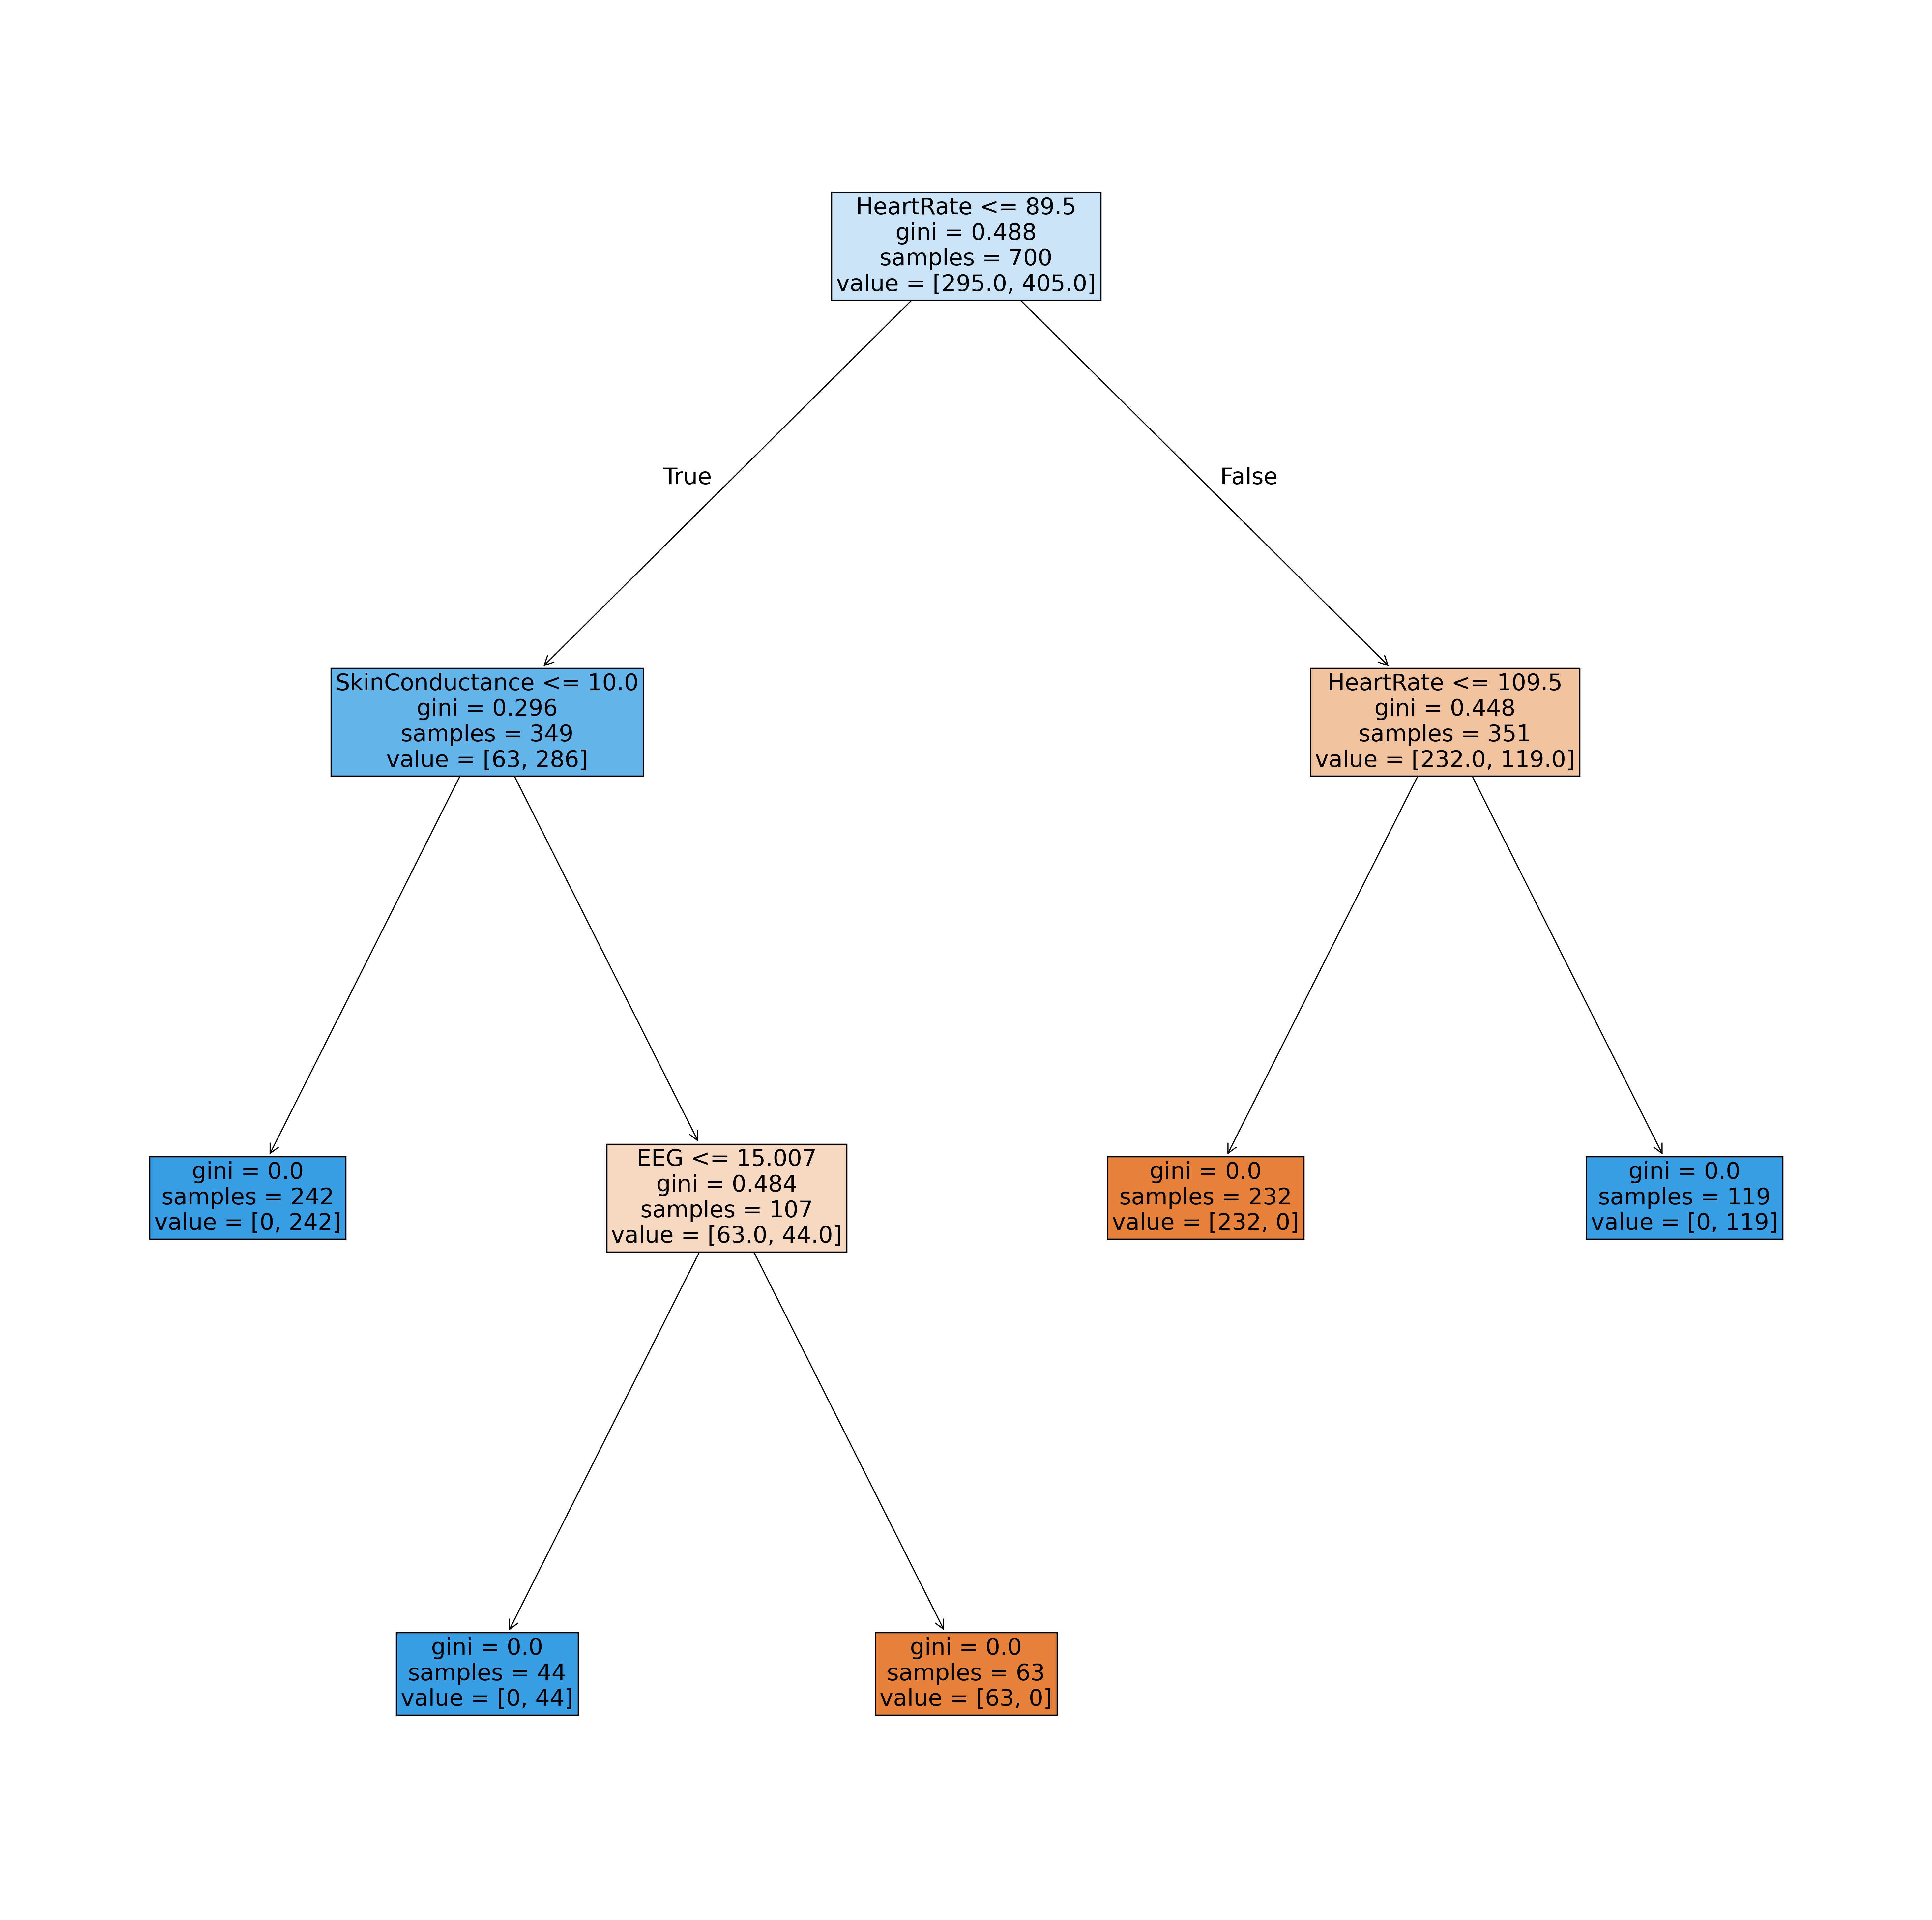

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

------------------------------------------------------------------------------------------------------------------------------------------------------


<center><h1><strong>EVALUATION FOR 15 DEPTH</strong></h1></center>

<h3><strong>Accuracy: 1.0000</strong></h3>

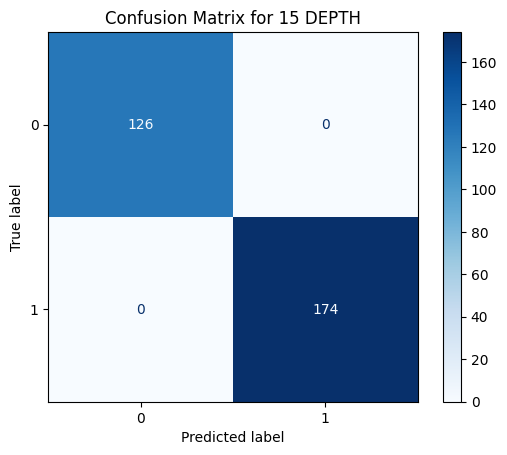

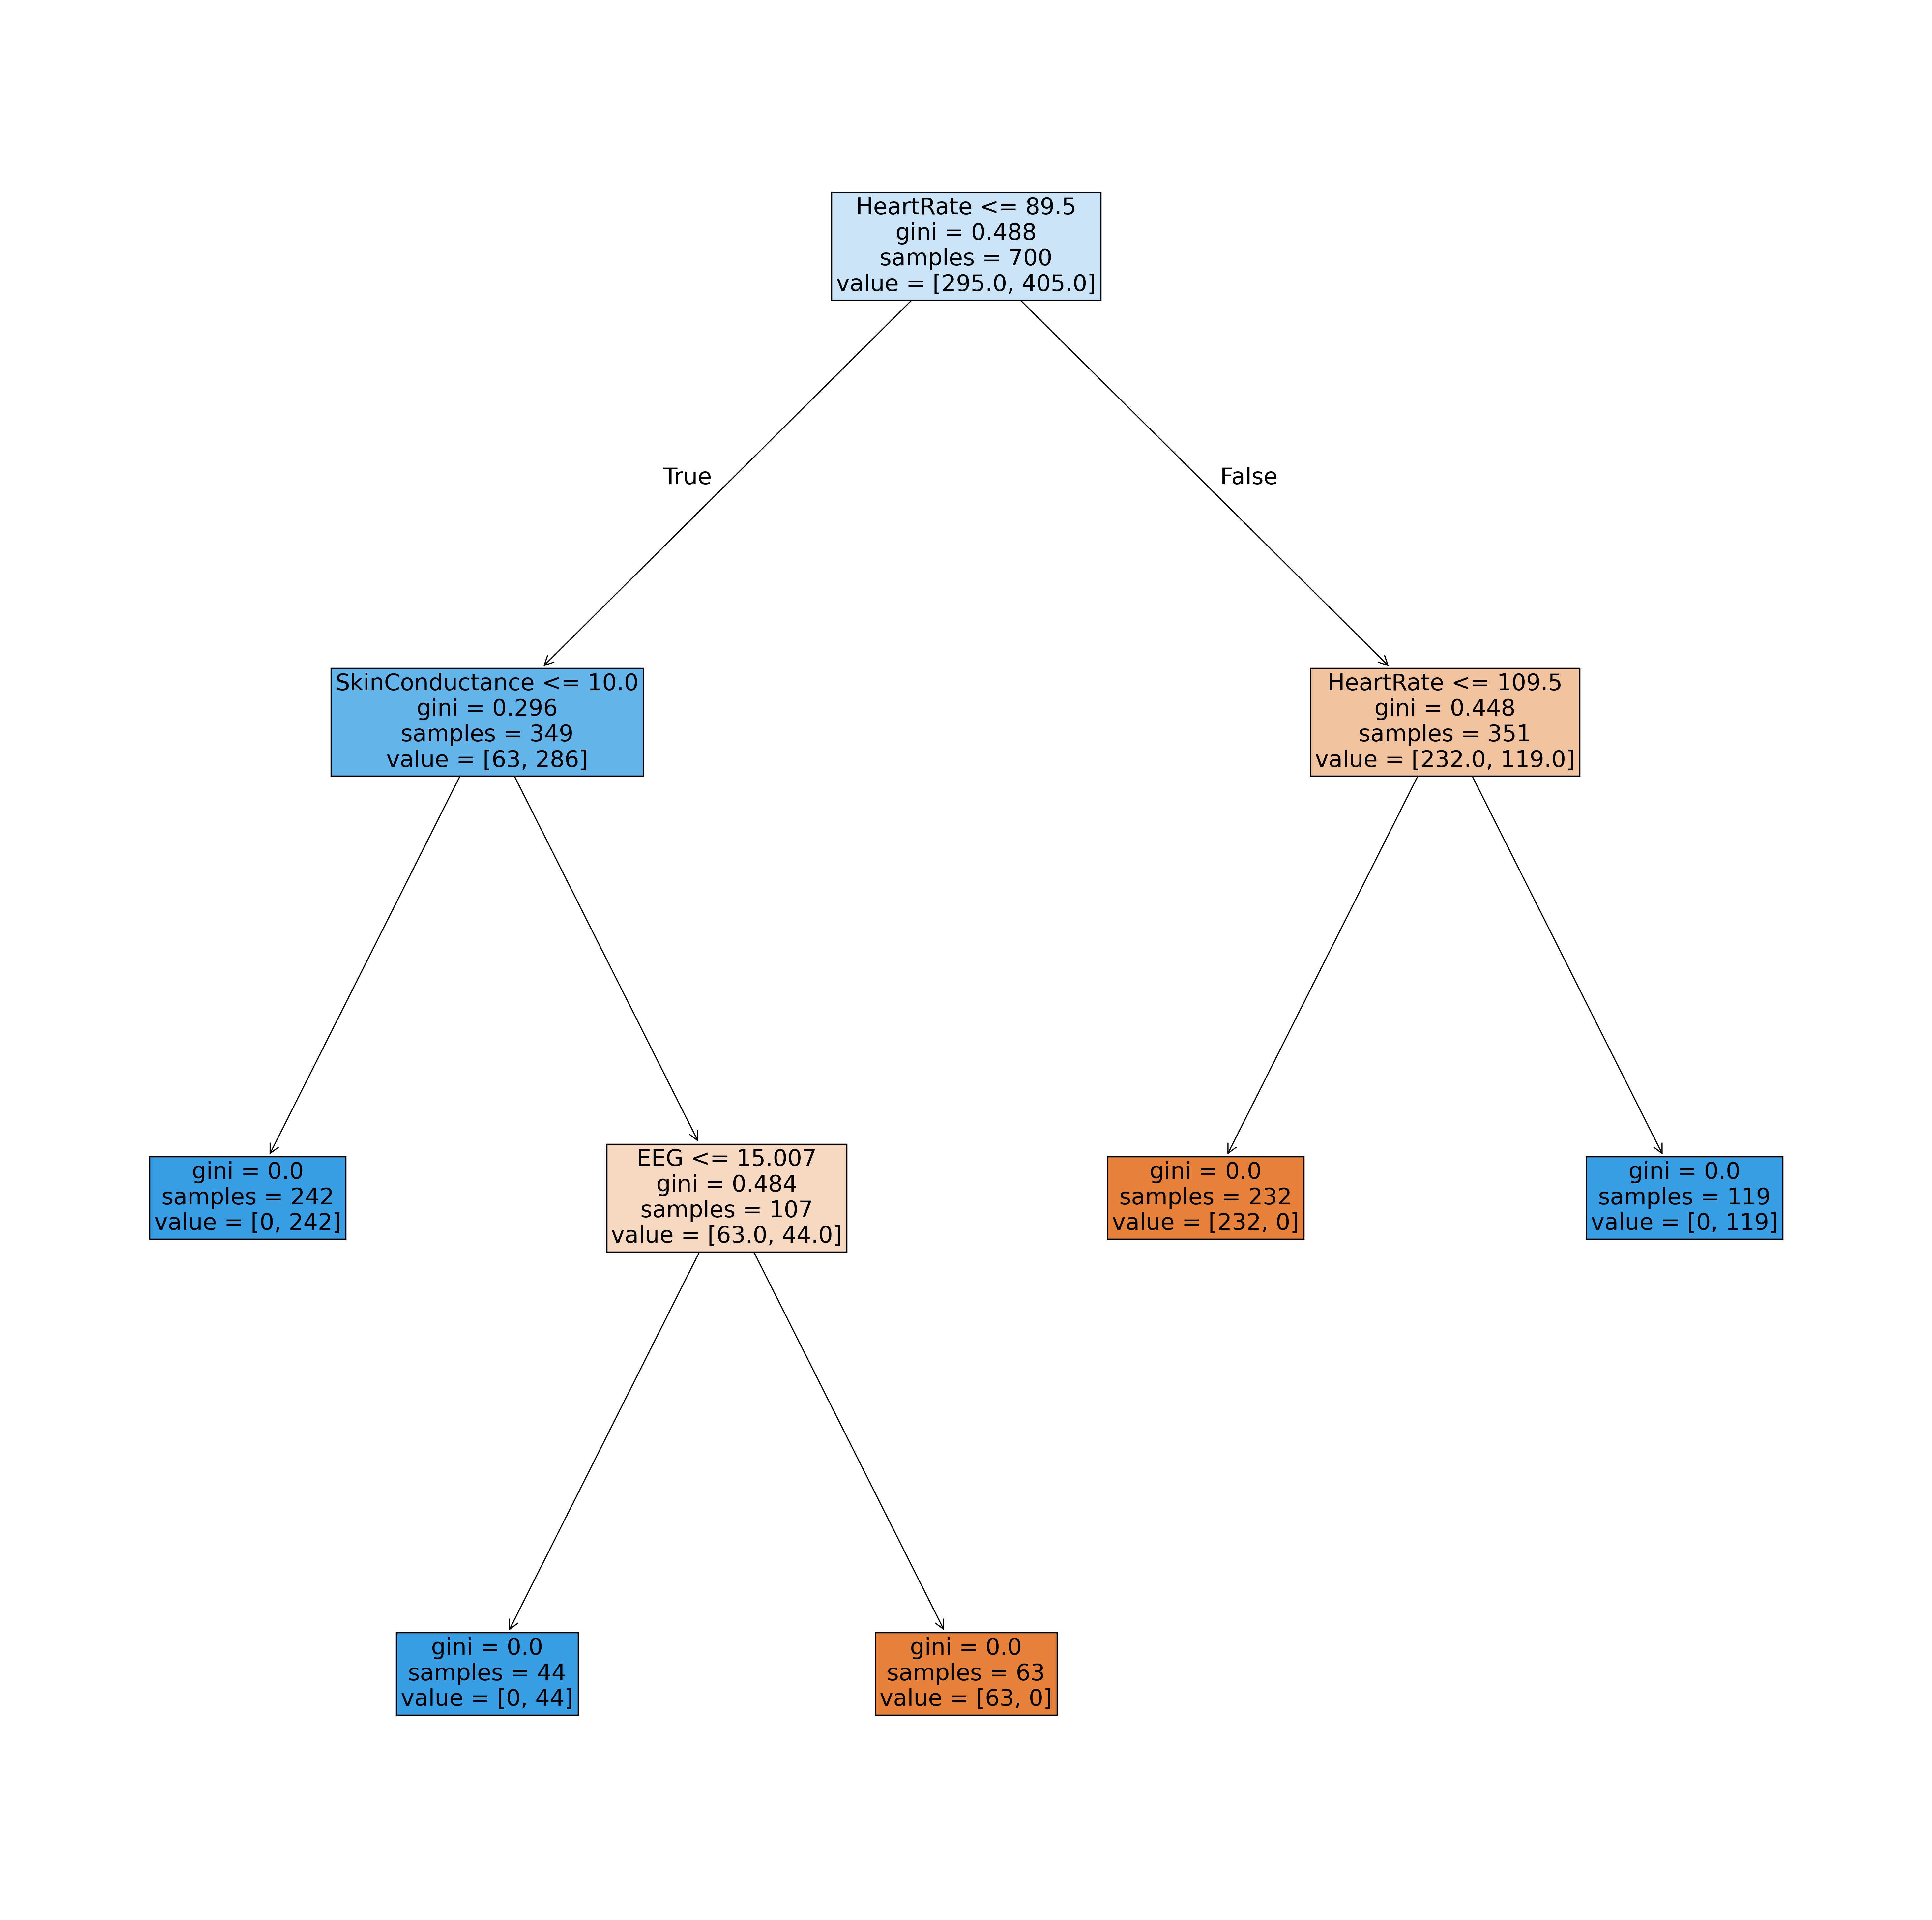

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       174

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [8]:
for key, target_pred in preds.items():
    print('-' * 150)
    display(Markdown(f'<center><h1><strong>EVALUATION FOR {key} DEPTH</strong></h1></center>'))
    
    # Accuracy
    accuracy = accuracy_score(target_test, target_pred)
    display(Markdown(f'<h3><strong>Accuracy: {accuracy:.4f}</strong></h3>'))
    
    # Confusion Matrix
    confusion = confusion_matrix(target_test, target_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {key} DEPTH')
    plt.figure(figsize=(30,30), dpi=250)
    plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);
    plt.show()
    
    print("Classification Report:")
    print(classification_report(target_test, target_pred))

---
---
## Conclusion: CART Model Evaluation and Inferences

Based on the evaluation of the CART (Classification and Regression Trees) model with different values of `max_depth`, the following conclusions can be drawn:


### 1. Accuracy Improvements
- The **accuracy** of the model improved as the `max_depth` increased:
  - **`max_depth=2`**: Accuracy = **0.9100**
  - **`max_depth=5`**: Accuracy = **1.0000**
  - **`max_depth=10`**: Accuracy = **1.0000**
  - **`max_depth=15`**: Accuracy = **1.0000**
- These results indicate that the model reached its optimal performance at a depth of 5, with no additional accuracy improvements for deeper trees.

---

### 2. Confusion Matrix Observations
- For **lower `max_depth` values** (e.g., 2), the confusion matrix showed higher misclassification rates, especially for closely related engagement levels.
- Starting at **`max_depth=5`**, the confusion matrix demonstrated perfect classification, with no misclassifications in the test set.

---

### 3. Classification Report Insights
- **Precision and Recall**:
  - At **low depths (e.g., 2)**, precision and recall were inconsistent, indicating underfitting.
  - From **`max_depth=5` onward**, precision, recall, and F1-scores reached **1.00**, showing that the model could classify all engagement levels correctly.
- **F1-Score**:
  - Moderate depths (e.g., **5-10**) provided the highest F1-scores, suggesting optimal performance.
  - Further increases in depth offered no additional gains.

---

### 4. Computational Efficiency
- **Shallow trees** (e.g., `max_depth=2`) trained quickly but struggled with underfitting and lower accuracy.
- **Deeper trees** (e.g., `max_depth=10` or `15`) required more training time but added no significant accuracy improvements after a depth of 5.

---

### 5. Recommendations
- The **optimal depth** for this CART implementation is **5**, where the model achieves perfect accuracy with efficient training and prediction times.
- Additional depths do not enhance performance and may unnecessarily increase computational complexity.
- Further fine-tuning of hyperparameters such as `min_samples_split` and `min_samples_leaf` could further optimize performance.

---

### Summary
The CART model effectively predicts engagement levels when appropriately tuned. **`max_depth=5`** is the optimal parameter value for this dataset, balancing accuracy, interpretability, and computational efficiency. Further adjustments to additional hyperparameters can refine the model for more complex datasets or requirements.
